# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?appid='


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | am djarass
City not found. Skipping...
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | espargos
City not found. Skipping...
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | dryden
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | nuuk
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | bam
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | bac lieu
Processing Record 17 of Set 1 | constantia
Processing Record 18 of Set 1 | pieksamaki
Processing Record 19 of Set 1 | bulgan
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | turuvekere
Processin

Processing Record 40 of Set 4 | cidade velha
Processing Record 41 of Set 4 | newman
Processing Record 42 of Set 4 | kudahuvadhoo
Processing Record 43 of Set 4 | sungai penuh
Processing Record 44 of Set 4 | uturoa
Processing Record 45 of Set 4 | nyuzen
Processing Record 46 of Set 4 | callao
Processing Record 47 of Set 4 | tindouf
Processing Record 48 of Set 4 | stanisic
Processing Record 49 of Set 4 | tagta
Processing Record 0 of Set 5 | boguchany
Processing Record 1 of Set 5 | new norfolk
Processing Record 2 of Set 5 | tafuna
Processing Record 3 of Set 5 | vigia
Processing Record 4 of Set 5 | tyumentsevo
Processing Record 5 of Set 5 | guangshui
Processing Record 6 of Set 5 | sao paulo de olivenca
Processing Record 7 of Set 5 | hermanus
Processing Record 8 of Set 5 | glendive
Processing Record 9 of Set 5 | keszthely
Processing Record 10 of Set 5 | phalaborwa
Processing Record 11 of Set 5 | saldanha
Processing Record 12 of Set 5 | hovd
Processing Record 13 of Set 5 | sharhorod
Processing

Processing Record 32 of Set 8 | opuwo
Processing Record 33 of Set 8 | olinda
Processing Record 34 of Set 8 | qulsary
Processing Record 35 of Set 8 | upington
Processing Record 36 of Set 8 | sterling
Processing Record 37 of Set 8 | namdrik
Processing Record 38 of Set 8 | bairnsdale
Processing Record 39 of Set 8 | benguela
Processing Record 40 of Set 8 | alo
Processing Record 41 of Set 8 | atherton
Processing Record 42 of Set 8 | fale old settlement
Processing Record 43 of Set 8 | shatrovo
Processing Record 44 of Set 8 | namtsy
Processing Record 45 of Set 8 | nova vicosa
Processing Record 46 of Set 8 | nikolayevsk-on-amure
Processing Record 47 of Set 8 | valparaiso
Processing Record 48 of Set 8 | kasongo-lunda
Processing Record 49 of Set 8 | arawa
Processing Record 0 of Set 9 | tralee
Processing Record 1 of Set 9 | galliano
Processing Record 2 of Set 9 | la carlota
Processing Record 3 of Set 9 | belmonte
Processing Record 4 of Set 9 | mana
Processing Record 5 of Set 9 | rahimatpur
Proces

Processing Record 21 of Set 12 | kalemie
Processing Record 22 of Set 12 | ulladulla
Processing Record 23 of Set 12 | pendleton
Processing Record 24 of Set 12 | chapada dos guimaraes
Processing Record 25 of Set 12 | chegdomyn
Processing Record 26 of Set 12 | sherman
Processing Record 27 of Set 12 | nanning
Processing Record 28 of Set 12 | sandnessjoen
Processing Record 29 of Set 12 | tahe
Processing Record 30 of Set 12 | acapulco de juarez
Processing Record 31 of Set 12 | turiacu
Processing Record 32 of Set 12 | tobruk
Processing Record 33 of Set 12 | hobyo
Processing Record 34 of Set 12 | brooks
Processing Record 35 of Set 12 | hihifo
City not found. Skipping...
Processing Record 36 of Set 12 | bada
Processing Record 37 of Set 12 | muana
Processing Record 38 of Set 12 | marquelia
Processing Record 39 of Set 12 | gladstone
Processing Record 40 of Set 12 | broken hill
Processing Record 41 of Set 12 | alaghsas
Processing Record 42 of Set 12 | yermentau
Processing Record 43 of Set 12 | sam

city = "asau"
url = 'https://api.openweathermap.org/data/2.5/weather?appid='
city_url =  url + weather_api_key + "&q=" + city + "&units=metric"
city_weather = requests.get(city_url)
city_data = city_weather.json()
pprint.pprint(city_data)

In [5]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [6]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,8.61,93,7,1.11,NZ,1682620235
1,port elizabeth,-33.9180,25.5701,20.16,81,40,7.72,ZA,1682619657
2,edinburgh of the seven seas,-37.0676,-12.3116,17.38,79,98,8.60,SH,1682620235
3,dryden,49.7833,-92.7503,3.16,93,100,2.57,CA,1682620236
4,vorgashor,67.5833,63.9500,-8.05,90,17,6.40,RU,1682620236


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,8.61,93,7,1.11,NZ,1682620235
1,port elizabeth,-33.9180,25.5701,20.16,81,40,7.72,ZA,1682619657
2,edinburgh of the seven seas,-37.0676,-12.3116,17.38,79,98,8.60,SH,1682620235
3,dryden,49.7833,-92.7503,3.16,93,100,2.57,CA,1682620236
4,vorgashor,67.5833,63.9500,-8.05,90,17,6.40,RU,1682620236


### Create the Requested Scatter Plots

#### Latitude vs Temperature

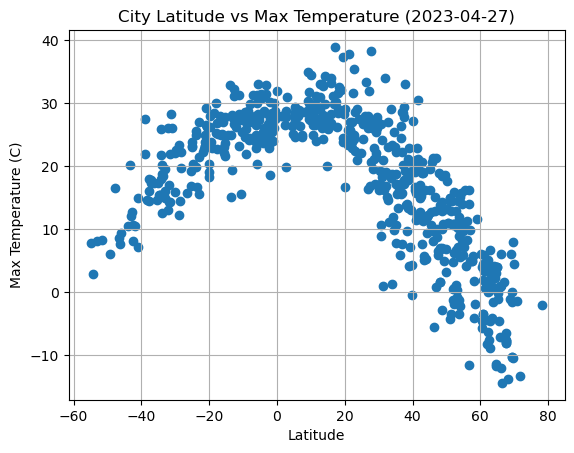

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],c="tab:blue")


# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs Humidity

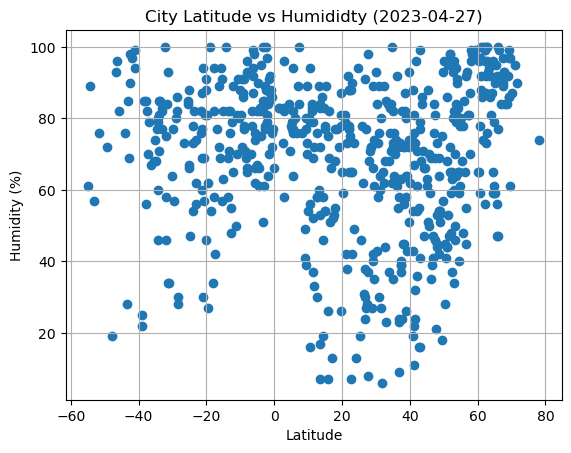

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],c="tab:blue")

# Incorporate the other graph properties
plt.title("City Latitude vs Humididty (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

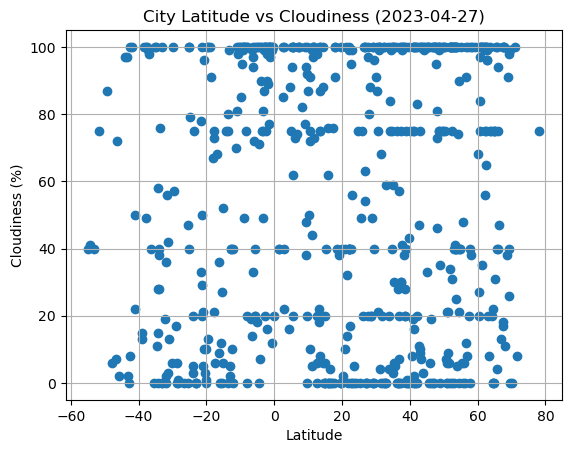

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],c="tab:blue")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs Wind Speed Plot

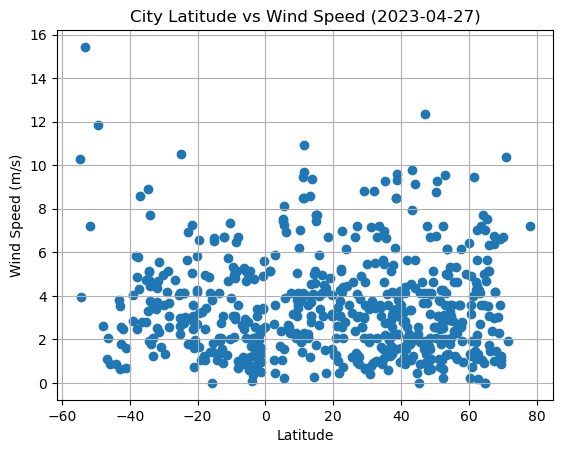

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],c="tab:blue")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [14]:
# function create Linear Regression plots
def stats(df,column):
    slope, inter, r, p, std_err = linregress(df['Lat'],df[column])
    regr_plot =  (slope * df["Lat"]) + inter
    return regr_plot

# function to show linear regression equation as a string
def eq_overlay(df,column):
    slope, inter, r, p, std_err = linregress(df['Lat'],df[column])
    equation = f'y = {round(slope,2)}x + {round(inter,2)}'
    return equation

# function to return r value
def r_calc(df,column):
    slope, inter, r, p, std_err = linregress(df['Lat'],df[column])
    r_value = r
    return r_value

def p_calc(df,column):
    slope, inter, r, p, std_err = linregress(df['Lat'],df[column])
    p_value = p
    return p_value


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north = city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemi_df = pd.DataFrame(north)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,dryden,49.7833,-92.7503,3.16,93,100,2.57,CA,1682620236
4,vorgashor,67.5833,63.9500,-8.05,90,17,6.40,RU,1682620236
5,nuuk,64.1835,-51.7216,2.34,87,20,7.72,GL,1682620054
7,college,64.8569,-147.8028,3.97,61,75,0.00,US,1682620237
8,bam,29.1060,58.3570,21.39,40,100,3.00,IR,1682620237


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df = pd.DataFrame(south)
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,8.61,93,7,1.11,NZ,1682620235
1,port elizabeth,-33.9180,25.5701,20.16,81,40,7.72,ZA,1682619657
2,edinburgh of the seven seas,-37.0676,-12.3116,17.38,79,98,8.60,SH,1682620235
6,ushuaia,-54.8000,-68.3000,7.79,61,40,10.29,AR,1682620236
9,port alfred,-33.5906,26.8910,18.43,85,76,1.79,ZA,1682620237


###  Temperature vs. Latitude Linear Regression Plot

In [17]:
# writing function to create plots and
# includes function written 3 cells above
def lat_plot(df, column, x, y, font_size, units):
    # print r value
    r = r_calc(df,column)
    print(f'The r-value is: {r}')
    p = p_calc(df,column)
    print(f'The p-value is {p}')

    # scatter plot of Northern Hemisphere
    plt.scatter(df['Lat'],df[column],c="tab:blue")

    # plot regression line
    plot_eq = stats(df,column)
    plt.plot(df["Lat"],plot_eq,"-",c="red")

    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.ylabel(f'{column} ({units})')
    

    # includ equation overlay on plot
    line = eq_overlay(df,column)
    plt.annotate(line, (x,y),fontsize=font_size,color="red")

    plt.show()

The r-value is: -0.8587266021875966
The p-value is 3.0569659027681106e-120


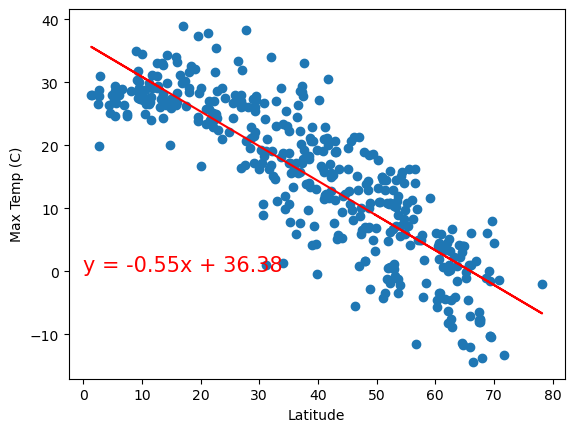

In [18]:
# plot for northern hemisphere
lat_plot(northern_hemi_df, "Max Temp",0,0, 15, "C")


The r-value is: 0.7889272616334329
The p-value is 3.4000190099010045e-41


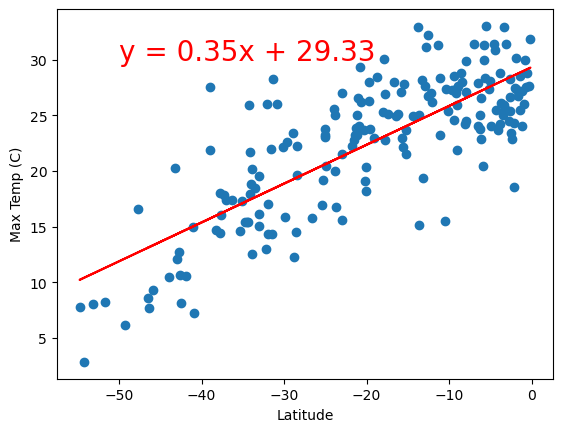

In [19]:
# plot for southern hemisphere
lat_plot(southern_hemi_df, "Max Temp",-50,30,20,"C")

## Latitude vs Maximum Temperature (C) for cities in the Northern Hemisphere
    - In the northern hemisphere, there is a strong negative correlation (r = -0.859) between latitude and the maximum temperature. The validity of this correlation is confirmed by its extremely low p-value of 3.057 e-120, meaning that this dataset is statistically signifigant.
    
## Latitude vs Maximum Temperature (C) for cities in the Southern Hemisphere
    - In the southern hemisphere, there is also a strong positive correlation (r = 0.789) between latitude and the maximum temperature. The validity of this correlation is confirmed by its extremely low p-value of 3.400 e-41, meaning that this dataset is statistically signifigant.

### Humidity vs. Latitude Linear Regression Plot




The r-value is: 0.1386404545268009
The p-value is 0.006867699909193065


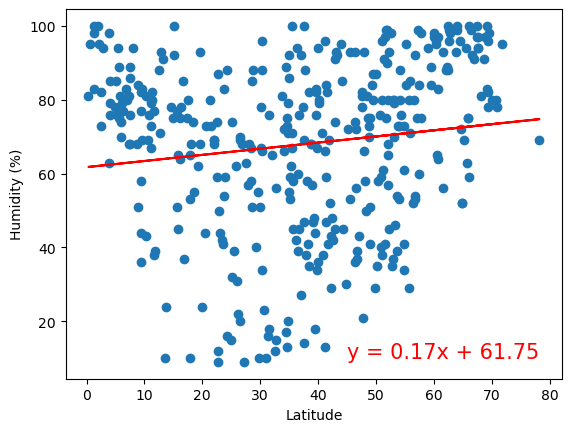

In [26]:
# Northern Hemisphere
lat_plot(northern_hemi_df, "Humidity",45,10,15,"%")

The r-value is: 0.11710842892477175
The p-value is 0.1402710773669517


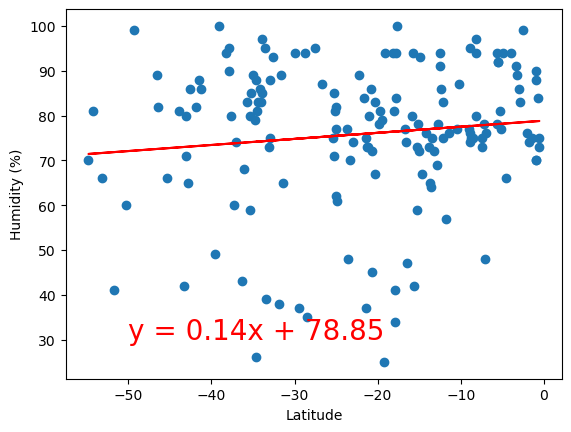

In [27]:
# Southern Hemisphere
lat_plot(southern_hemi_df, "Humidity",-50,30,20,"%")

## Latitude vs Humidity (%) for cities in the Northern Hemisphere
    - In the northern hemisphere, there is a negligible positive correlation (r = 0.138) between latitude and the humidity. The p-value is 0.00686, confirming that this negigible correlation is statistically signifigant.
    
## Latitude vs Humidity (%) for cities in the Southern Hemisphere
    - In the southern hemisphere, there is also a negligible positive correlation (r = 0.117) between latitude and humidity. The p-value is  0.140, meaning that this data is statistically insignifigant.
    

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14054773815152025
The p-value is 0.006129890375117234


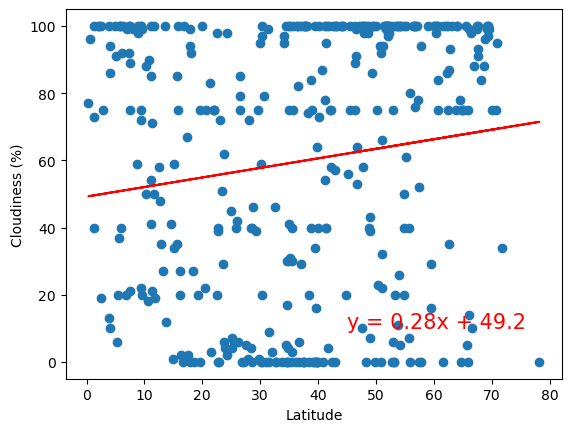

In [28]:
# Northern Hemisphere
lat_plot(northern_hemi_df, "Cloudiness",45,10,15,"%")

The r-value is: 0.1343916827263952
The p-value is 0.09020800755040166


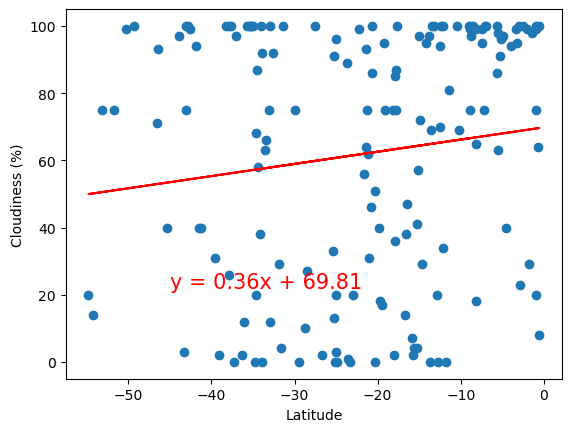

In [29]:
# Southern Hemisphere
lat_plot(southern_hemi_df, "Cloudiness",-45,22,15,"%")

## Latitude vs Cloudiness (%) for cities in the Northern Hemisphere
    - In the northern hemisphere, there is a negligible positive correlation (r = 0.141) between latitude and the cloudiness. The p-value is  0.00613, confirming that this negigible correlation is statistically signifigant.
    
## Latitude vs Cloudiness (%) for cities in the Southern Hemisphere
    - In the southern hemisphere, there is also a negligible positive correlation (r = 0.134) between latitude and cloudiness. The p-value is 0.0902, meaning that this data is statistically insignifigant.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.008950186601960812
The p-value is 0.8621252346611877


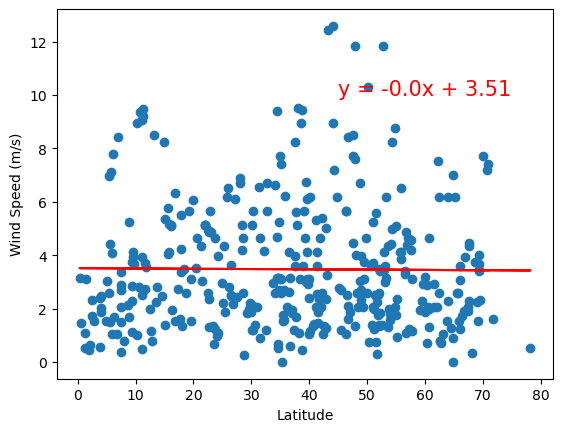

In [31]:
# Northern Hemisphere
lat_plot(northern_hemi_df, "Wind Speed",45,10,15,"m/s")

The r-value is: -0.3159393298820685
The p-value is 1.0021445687715679e-05


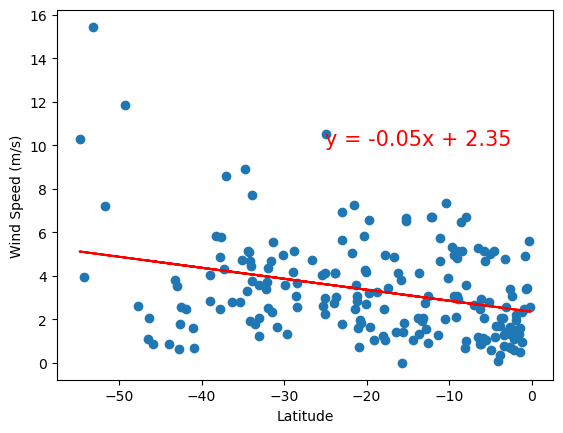

In [20]:
# Southern Hemisphere
lat_plot(southern_hemi_df, "Wind Speed",-25,10,15,"m/s")

## Latitude vs Wind Speed (m/s) for cities in the Northern Hemisphere
    - In the northern hemisphere, there is a negligible negative correlation (r = -0.00895) between latitude and windspeed. The p-value is 0.862, well beyond the conventional threshold for signifigance of p < .05, confirming that this negigible correlation is statistically insignifigant.
    
## Latitude vs Wind Speed (m/s) for cities in the Southern Hemisphere
    - In the southern hemisphere, there is also a low negative correlation (r = -0.316) between latitude and windspeed. The p-value is 1.002e-05, meaning that this data is statistically signifigant.